# <u>Stock Market data</u>

In this project we analyse the stock price data of different companies.<br>
We will compare the behaviour of stock prices by making graphs and different trading strategies.<br>
This project will give us an idea about the risk from previous data and will help us to predict the future stock prices.

Data will be fetched by web scraping from https://markets.financialcontent.com/ only. <br>
Companies for which stock price data is fetched-
- <b>Apple (AAPL)
- Google (GOOGL)
- Microsoft (MSFT)</b><br>

Packages used-
- pandas
- numpy
- beautifulsoup4
- urllib.request
- matplotlib
- seaborn

In [1]:
import math
import pandas as pd
import numpy as np
import bs4 as bs
import urllib.request as ur
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings(action='once')

### Function to get the page-source of the company's url
- This the first step to get the data through web scraping.
- It gets the page's source by going to the given url and returns it.
- The page's source will further be used by BeautifulSoup for futher operations.

In [2]:
def get_page_source(url):
    with ur.urlopen(url) as page_source:
        return page_source.read()

### Function to scrape the page and return the data as a list
- Here all the required data is scraped from the page.<br>
- First it gets the page's source from the url given.<br>
- It converts the page's source to BeautifulSoup object.<br>
- Then it gets the table tag where all the the data is stored.<br>
- It takes the data from each table row and stores them as list.<br>
- It returns the final list.

In [3]:
def scraping(company, mnth, year):
    scrape_data = []
    page_url = "https://markets.financialcontent.com/stocks/quote/historical?Symbol=%s&Month=%d&Year=%d&Range=12"
    source = get_page_source(page_url % (company, mnth, year))
    soup = bs.BeautifulSoup(source, "lxml")
    table_data = soup.find("table", class_="quote_detailed_price_table data").find_all("tr")
    for row in table_data:
        r_data = row.find_all("td")
        scrape_data.append([data.text for data in r_data])
    return scrape_data

### Function to create the DataFrame with the scraped_data
The scraped data is converted to DataFrame with column names:
- Open- The price at which the first share was traded for the current trading day.
- High- The highest price at which the stocks were sold for the current trading day.
- Low- The lowest price at which the stocks were sold for the current trading day.
- Close- The price at which the last share was traded for the current trading day.
- Volume- Is the amount of shares bought/sold of a stock in a given period of time.
- Change(%) - This is the difference between the Last Trading Days Closing Price and the Current Price (Last Price).

In [4]:
def create_dframe(scrape_data):
    return pd.DataFrame(scrape_data, columns=["Date", "Open", "High", "Low", "Close", "Volume", "Change(%)"]).set_index("Date")

### Funtion to store the DataFrame as .csv file
Stores the DataFrame as a .csv file so locally so that work can be done w/o fetching data from url again and again.

In [5]:
def to_csv(frame, name):
    frame.to_csv(f"{name}_data.csv", encoding="utf-8")

In [6]:
# This is to store the company code names that are used by websites to give stock data.
abbr = ("AAPL", "GOOGL", "MSFT")

# Storing the full comapny names so that they can be used when required.
name = ('Apple','Google','Microsoft')

In [7]:
# Store the current date inorder to scrape data of 1 year from current month and year.

dt = datetime.date.today()
mnth = dt.month
year = dt.year

### Get the page-source, create DataFrame and store the data as .csv

In [8]:
for company in abbr:
    scrape_data = scraping(company, mnth, year)
    frame = create_dframe(scrape_data[1:])
    to_csv(frame, company)

### Get the from local storage to do further analysis

In [9]:
apple = pd.read_csv("AAPL_data.csv", index_col="Date", parse_dates=True)
google = pd.read_csv("GOOGL_data.csv", index_col="Date", parse_dates=True)
microsoft = pd.read_csv("MSFT_data.csv", index_col="Date", parse_dates=True)

In [10]:
companies = (apple, google, microsoft)

### Overview of the DataFrame
- Taking a general look at the DataFrame of Google to get the idea of the data.

In [11]:
google.head(25)

,Open,High,Low,Close,Volume,Change(%)
Date,,,,,,
2018-07-27,1289.0,1291.0,1244.0,1253.0,"2,417,924",-32.61(-2.54%)
2018-07-26,1267.0,1287.0,1263.0,1286.0,"2,732,503",+9.56(+0.75%)
2018-07-25,NaN,1278.0,1249.0,1276.0,"2,571,751",+17.79(+1.41%)
2018-07-24,1271.0,1275.0,1244.0,1258.0,"5,379,721",+47.15(+3.89%)
2018-07-23,1196.0,1215.0,1192.0,1211.0,"3,264,232",+13.12(+1.10%)
2018-07-20,1199.0,1210.0,1197.0,1198.0,"1,898,376",-1.22(-0.10%)
2018-07-19,1207.0,1216.0,1198.0,1199.0,"1,916,468",-13.81(-1.14%)
2018-07-18,1209.0,1222.0,1205.0,1213.0,"1,947,372",-0.17(-0.01%)
2018-07-17,1183.0,1219.0,1182.0,1213.0,"2,006,280",+16.57(+1.38%)


In [12]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2018-07-27 to 2017-08-02
Data columns (total 6 columns):
Open         230 non-null float64
High         244 non-null float64
Low          243 non-null float64
Close        249 non-null float64
Volume       249 non-null object
Change(%)    249 non-null object
dtypes: float64(4), object(2)
memory usage: 13.6+ KB


- We can see that the DataFrame of Google has some NaN values and  some values with 0.<br>
- The datatype of Volume column in object instead of integer due to comma in b/w the values.<br>
- We will handle these errors by:
 - Coverting the Volume column to int64.
 - We fill the NaN values by the same value from the row above them.
 - We will replace all the zeros in the Volume column by the values in the above row.
 - Drop the NaN row which will mostly be the first row as there will not be any value to fill above it.

### Converting Volume to integer and handling all unnecessary values
- We first remove the commas from values of Volume column and then convert its  datatype to int.<br>
- Then we fill all the rows with NaN values the latest value for that particular column.<br>
- We replace the 0 value in Volume column with the latest value.<br>
- At last we convert the DataFrame to .csv file to store it in local storage for future reference.

In [13]:
for i in range(3):
    companies[i]["Volume"] = companies[i]["Volume"].str.replace(",", "").astype(int)
    companies[i].fillna(method="ffill", inplace=True)
    companies[i]["Volume"].replace(0, method="ffill", inplace=True)
    companies[i].dropna(how="any", inplace=True)
    to_csv(companies[i], abbr[i])

In [14]:
apple.head(25)

,Open,High,Low,Close,Volume,Change(%)
Date,,,,,,
2018-07-27,194.99,195.19,190.10,190.98,24015972,-3.23(-1.66%)
2018-07-26,194.61,195.96,193.70,194.21,19064483,-0.61(-0.31%)
2018-07-25,194.61,194.85,192.43,194.82,16812981,+1.82(+0.94%)
2018-07-24,192.45,193.66,192.05,193.00,18695180,+1.39(+0.73%)
2018-07-23,190.68,191.96,189.56,191.61,15982471,+0.17(+0.09%)
2018-07-20,190.68,192.43,190.17,191.44,20706042,-0.44(-0.23%)
2018-07-19,189.69,192.55,189.69,191.88,20281559,+1.48(+0.78%)
2018-07-18,191.78,191.80,189.93,190.40,16383980,-1.05(-0.55%)
2018-07-17,189.75,191.87,189.20,191.45,15531983,+0.54(+0.28%)


In [15]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2018-07-27 to 2017-08-02
Data columns (total 6 columns):
Open         249 non-null float64
High         249 non-null float64
Low          249 non-null float64
Close        249 non-null float64
Volume       249 non-null int64
Change(%)    249 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 13.6+ KB


We can see that we successfully cleaned the data as all the errors that were previously mentioned have been removed and now the DatFrame is fit for further analysis.

In [16]:
# Summary of stats of Apple stock

In [17]:
apple.describe()

,Open,High,Low,Close,Volume
count,249.000000,249.000000,249.000000,249.000000,2.490000e+02
mean,172.332731,173.661205,171.036466,172.366827,2.967726e+07
std,11.492926,11.442932,11.616059,11.561443,1.248937e+07
min,149.990000,151.830000,149.160000,150.550000,1.251979e+07
25%,162.620000,163.890000,160.180000,162.320000,2.092550e+07
50%,172.540000,173.920000,171.420000,172.430000,2.636502e+07
75%,179.260000,180.500000,178.170000,179.260000,3.499706e+07
max,194.990000,195.960000,193.700000,194.820000,8.659382e+07


### DataFrame to store Opening and Closing stock pirce of all companies
- Storing the Open and Close price of all companies as DataFrame to plot them in one go.

In [18]:
open_price = pd.DataFrame({"AAPL": apple["Open"],
                          "GOOGL": google["Open"],
                          "MSFT": microsoft["Open"]})

In [19]:
close_price = pd.DataFrame({"AAPL": apple["Close"],
                           "GOOGL": google["Close"],
                           "MSFT": microsoft["Close"]})

In [20]:
# Remove all rows with NaN value
open_price.dropna(how="any", inplace=True)
close_price.dropna(how="any", inplace=True)

## <u> Data Representation Of Companies </u>

### Line graph for Open and Close

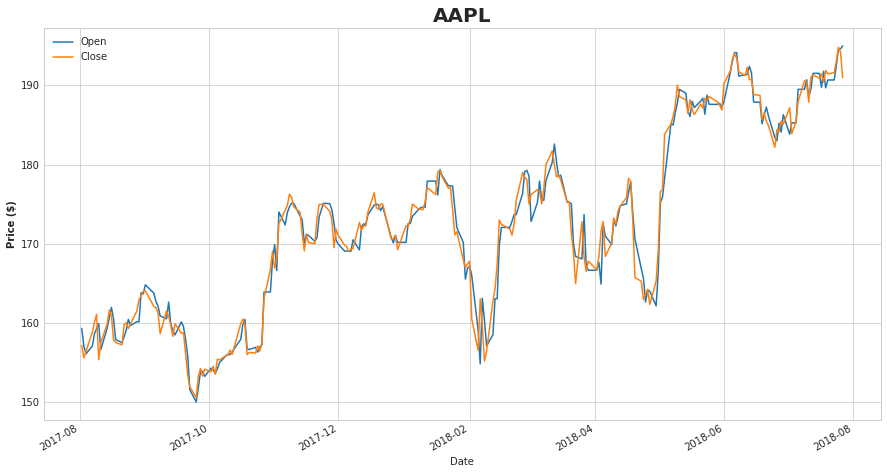

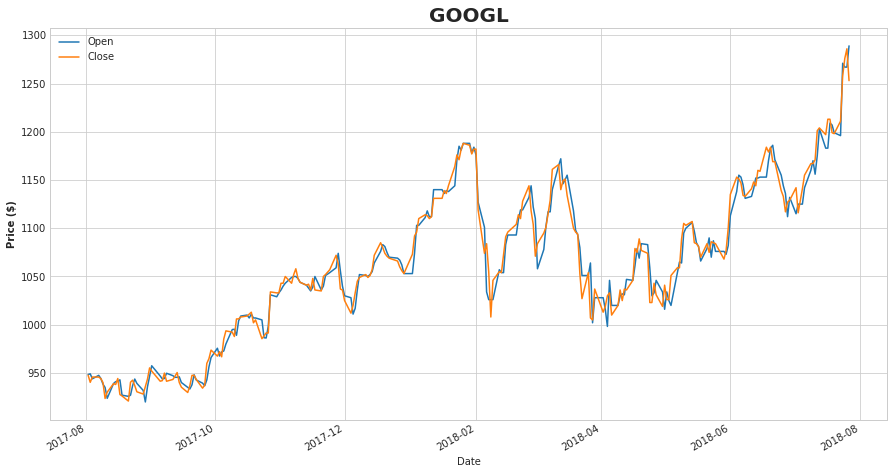

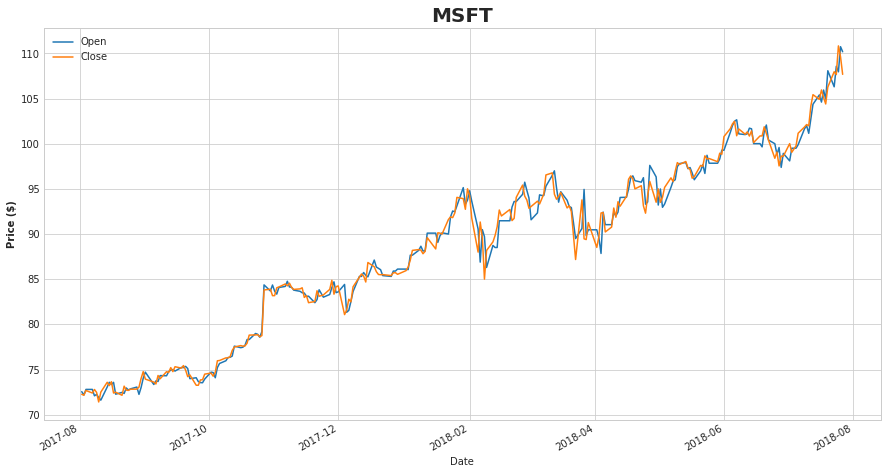

In [21]:
for i in range(3):
    open_price[abbr[i]].plot(grid=True, label="Open")
    close_price[abbr[i]].plot(grid=True, figsize=(15, 8), label="Close")
    plt.title(abbr[i], fontsize=20, fontweight="bold")
    plt.ylabel("Price ($)", fontweight="bold")
    plt.legend()
    plt.show()

From the above graph we can see that for
- <b>Apple</b>:<br>
The maximum growth is b/w 2018-05 to 2018-07.<br>
The random price fluctuation is very less when compared to other companies.
- <b>Google</b>:<br>
The maximum growth is b/w 2018-01 to 2018-03.<br>
It is having the highest fluctuation in random price.
- <b>Microsoft</b>:<br>
The maximum growth is b/w 2018-05 to 2018-07.<br>
The random price fluctuation is in b/w the other two companies.

### Line graph for Volume

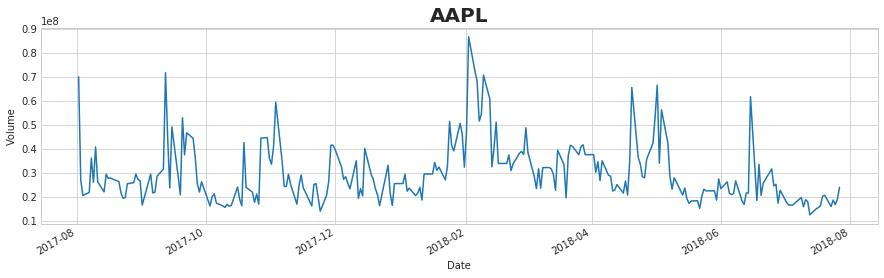

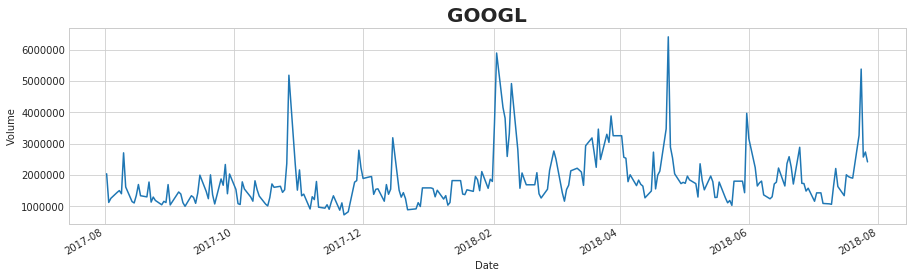

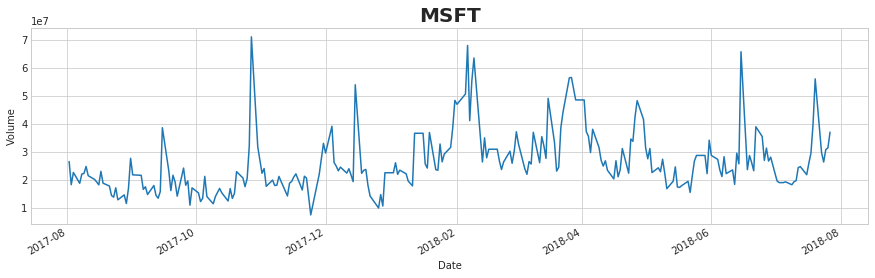

In [22]:
for i in range(3):
    companies[i]["Volume"].plot(figsize=(15, 4), grid=True)
    plt.title(abbr[i], fontsize=20, fontweight="bold")
    plt.ylabel("Volume")
    plt.show()

We can see that for:
- <b>Apple</b>: The highest stock being traded was b/w 2018-01 to 2018-03.
- <b>Google</b>: The highest stock being traded was b/w 2018-03 to 2018-05.
- <b>Microsoft</b>: The highest stock being traded was b/w 2017-09 to 2017-11.

## <u>Building Trading Startegies</u>

### Calculating Simple Moving Average(SMA) on all companies
- One of the oldest and simplest trading strategies that exist is the one that uses a moving average of the price (or returns) timeseries to proxy the recent trend of the price.<br>
- The idea is quite simple, yet powerful; if we use a (say) 50-day moving average of our price time-series, then a significant portion of the daily price noise will have been "averaged-out". Thus, we can can observe more closely the longer-term behaviour of the asset.
- In Pandas it is quite easy. We can do it rolling() function.

In [23]:
sma_s = close_price.rolling(window=10).mean().dropna(how="any")     # SMA for 10 days
sma_l = close_price.rolling(window=50).mean().dropna(how="any")     # SMA for 50 days

In [24]:
start = str(sma_l.index[0]).split()[0]                              # Date to start plotting

### Plotting SMA for all companies and their Crossovers
- <b>Crossover</b>- The moving average crossover strategy relies on the interaction between two moving averages of different periods.<br>
 - One is a moving average over a short period, and the other is a moving average over a longer period.<br>
 - When the short moving average crosses under the long, this can be interpreted as a <b>negative signal</b> that the market is <b>trending downwards</b>.<br>
 - Conversely if the short moving average crosses over the long, this can be interpreted as a <b>positive signal</b> that the market is <b>trending upwards</b>.

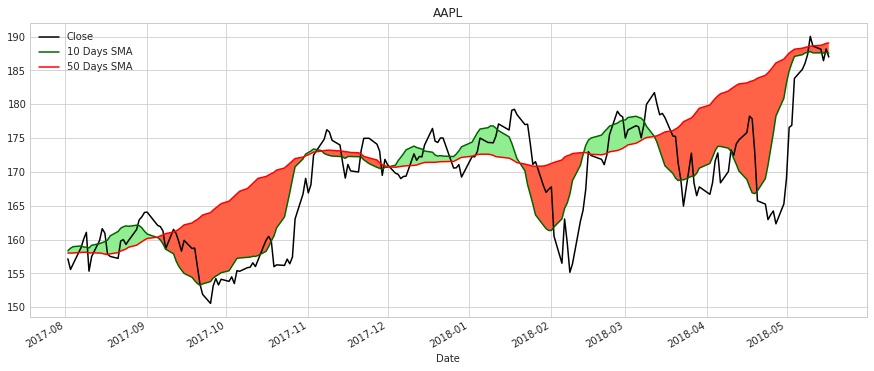

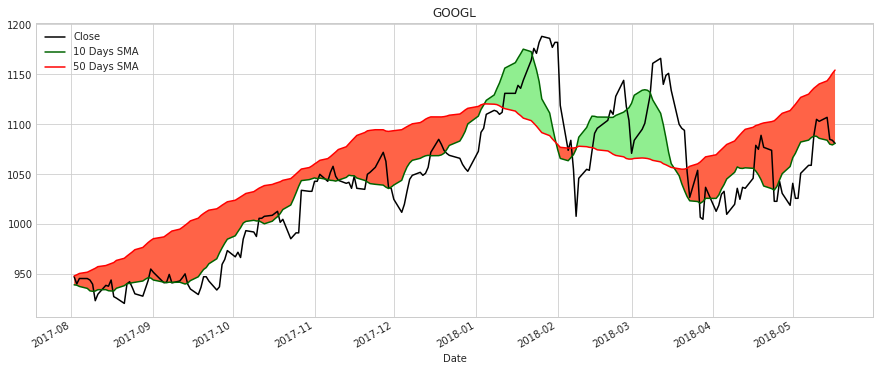

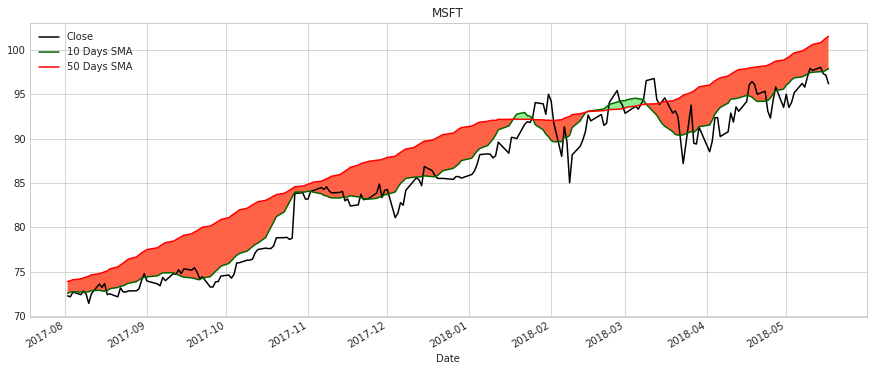

In [25]:
for i in range(3):
    close_price.loc[start:, abbr[i]].plot(x=close_price.loc[start:, abbr[i]].index, label="Close", color="black")
    sma_s.loc[start:, abbr[i]].plot(x=sma_s.loc[start:, abbr[i]].index, label="10 Days SMA", color="darkgreen")
    sma_l.loc[start:, abbr[i]].plot(x=sma_l.loc[start:, abbr[i]].index, label="50 Days SMA", figsize=(15, 6), color="red")
    plt.fill_between(x=sma_l.loc[start:, abbr[i]].index, y1=sma_s.loc[start:, abbr[i]], y2=sma_l.loc[start:, abbr[i]], where=sma_l.loc[start:, abbr[i]] > sma_s.loc[start:, abbr[i]], facecolor='tomato', interpolate=True)
    plt.fill_between(x=sma_l.loc[start:, abbr[i]].index, y1=sma_s.loc[start:, abbr[i]], y2=sma_l.loc[start:, abbr[i]], where=sma_l.loc[start:, abbr[i]] < sma_s.loc[start:, abbr[i]], facecolor='lightgreen', interpolate=True)
    plt.title(abbr[i])
    plt.legend()
    plt.show()

- <b>Green</b> represents the area where SMA for short period over SMA for long period.
- <b>Red</b> represents the area where SMA for short period under SMA for long period.

- It is straightforward to observe that SMA timeseries are much less noisy than the original price timeseries.<br> However, this comes at a cost: SMA timeseries lag the original price timeseries, which means that changes in the trend are only seen with a delay (lag) of L days.
- One way to reduce the lag induced by the use of the SMA is to use the so-called Exponential Moving Average (EMA)
- The reason why EMA reduces the lag is that it puts more weight on more recent observations, whereas the SMA weights all observations equally by <b>${1/M}$</b>.
- Using Pandas, calculating the exponential moving average is easy. We need to provide a lag value, from which the decay parameter α is automatically calculated.
- To be able to compare with the short-time SMA we will use a span value of 20.

### Calculating Exponential Moving Averages (EMA)

In [26]:
ema_s = close_price.ewm(span=20, adjust=False).mean()                     # EMA for 20 Days
sma_s = close_price.rolling(window=20).mean().dropna(how="any")           # SMA for 20 Days

In [27]:
start = start = str(sma_s.index[0]).split()[0]

### Plotting EMA

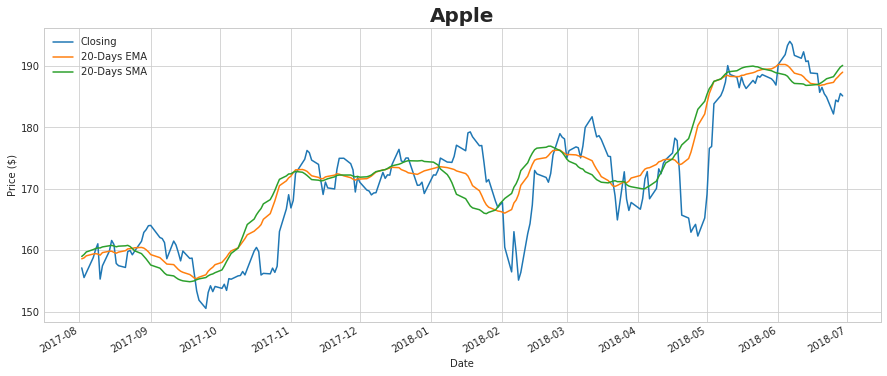

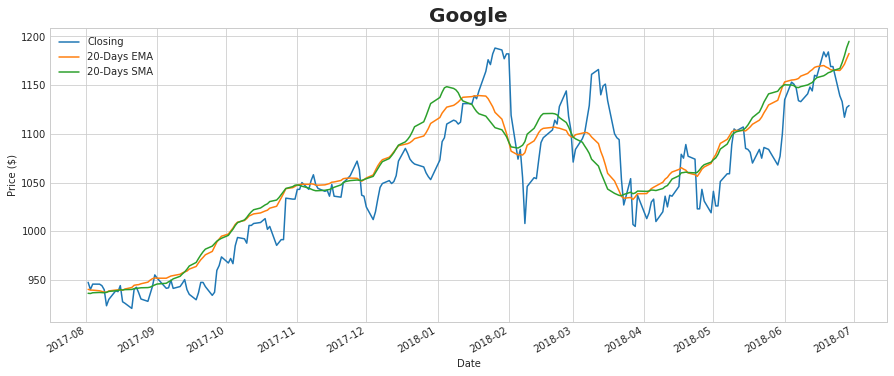

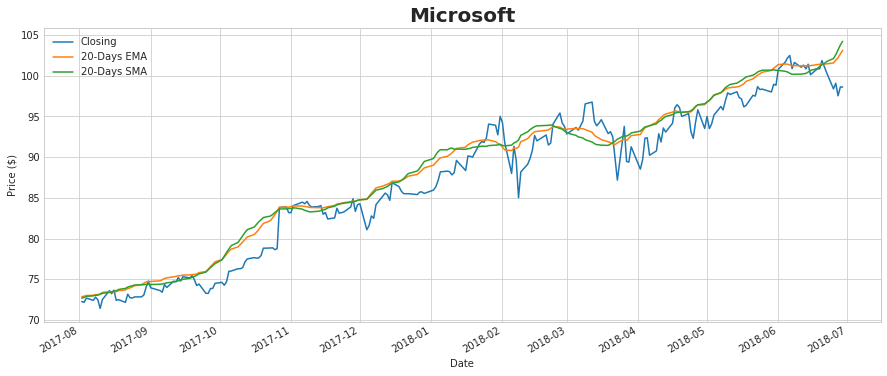

In [28]:
for i in range(3):
    close_price.loc[start:, abbr[i]].plot(x=close_price.loc[start:].index, label="Closing")
    ema_s.loc[start:, abbr[i]].plot(x=sma_l.loc[start:].index, label="20-Days EMA")
    sma_s.loc[start:, abbr[i]].plot(x=sma_s.loc[start:].index,  label="20-Days SMA", grid=True,figsize=(15, 6))
    plt.ylabel("Price ($)")
    plt.title("{}".format(name[i]), fontsize=20, fontweight="bold")
    plt.legend(loc="upper left")
    plt.show()

- A moving average simplifies price data by smoothing it out and creating one flowing line.<br>
- This makes seeing the trend easier.<br>
- Exponential moving averages react quicker to price changes than simple moving averages which can be seen in upper graph.

### Calculating Daily Returns for all companies
Inorder to analyze the risk of the stock we need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the companies stock.

In [29]:
daily_returns = close_price.pct_change()
daily_returns.dropna(how="any", inplace=True)

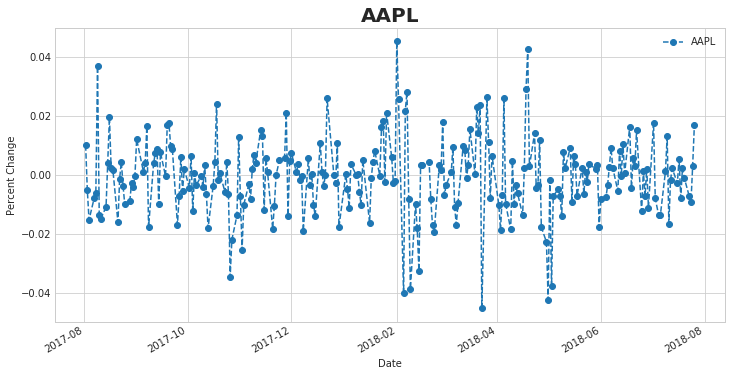

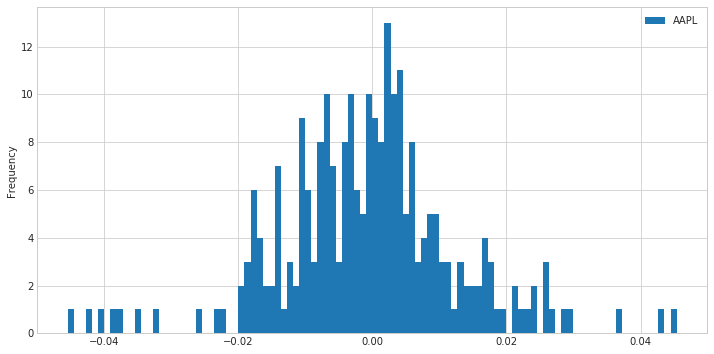

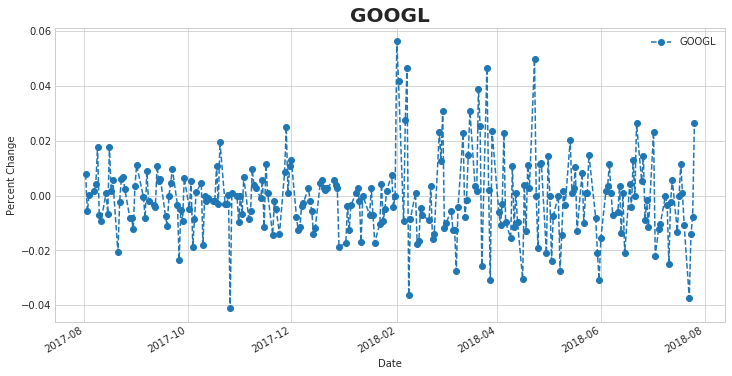

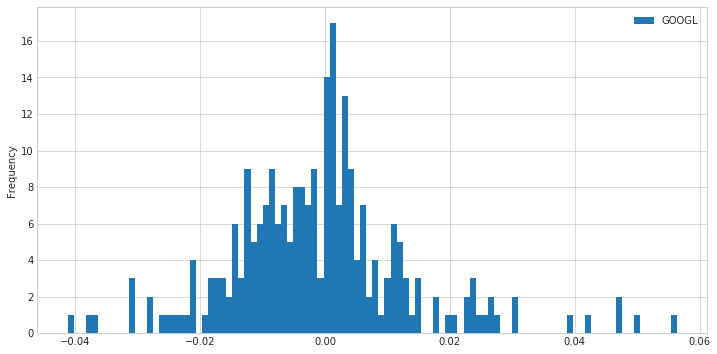

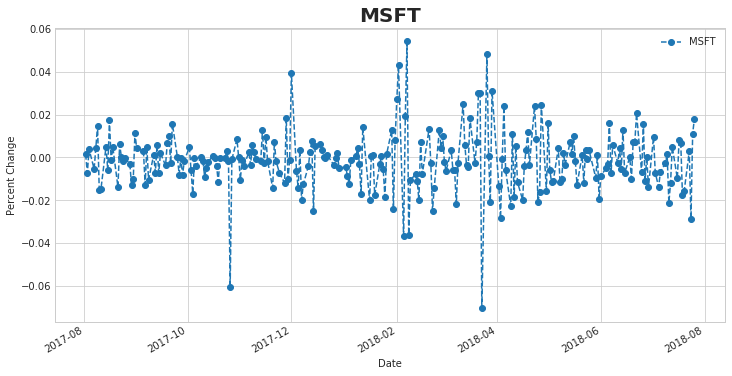

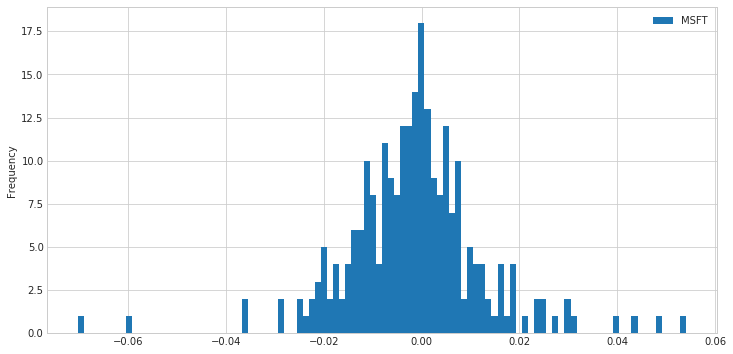

In [30]:
for i in range(3):
    daily_returns[abbr[i]].plot(figsize=(12, 6), grid=True, legend=True, linestyle='--', marker='o')
    plt.ylabel("Percent Change")
    plt.title(abbr[i], fontsize=20, fontweight="bold")
    plt.show()
    daily_returns[abbr[i]].plot.hist(bins=100, figsize=(12, 6), grid=True, legend=True)
    plt.show()

### Correlation b/w companies

/home/abhie/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


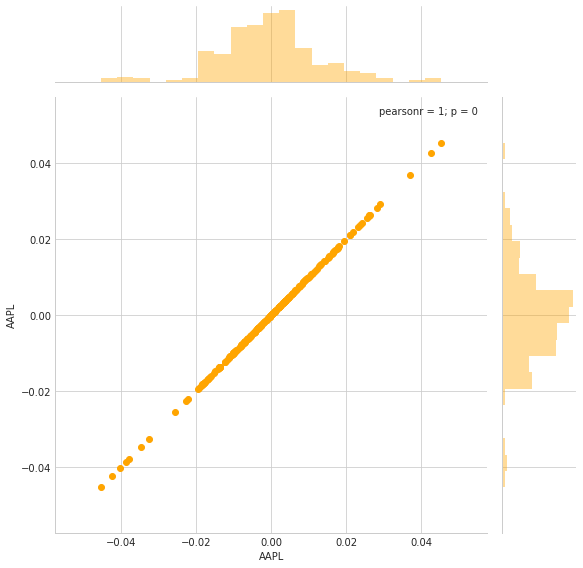

In [31]:
sns.jointplot(daily_returns["AAPL"], daily_returns["AAPL"], daily_returns ,kind='scatter',color='orange', size=8)
plt.show()

- We can see that if stocks of two companies are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. <br>
- So now lets plot the graphs b/w all the companies.

/home/abhie/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


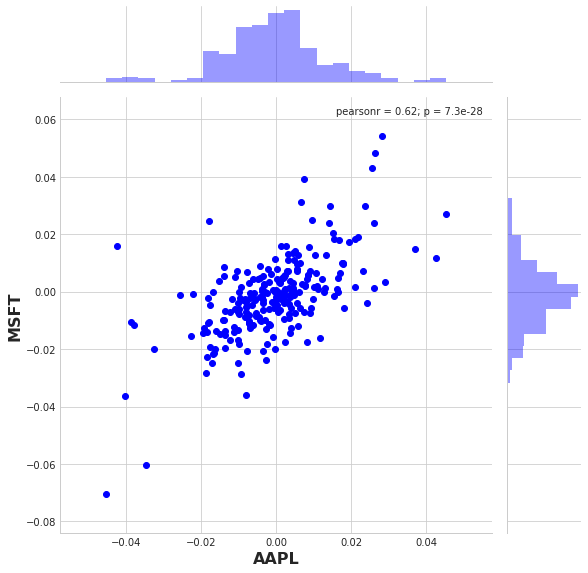

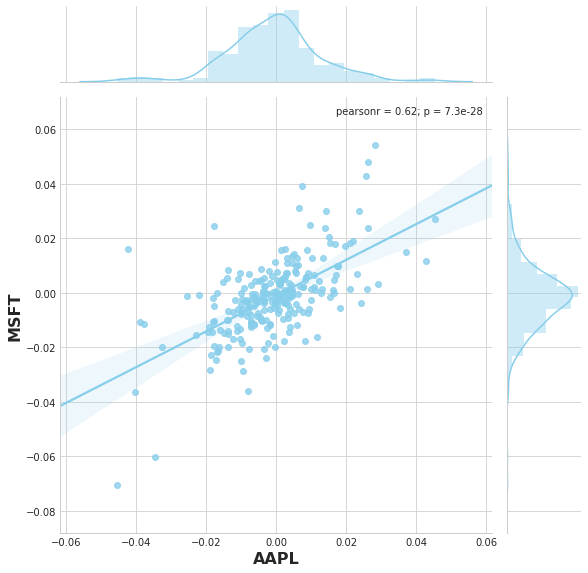

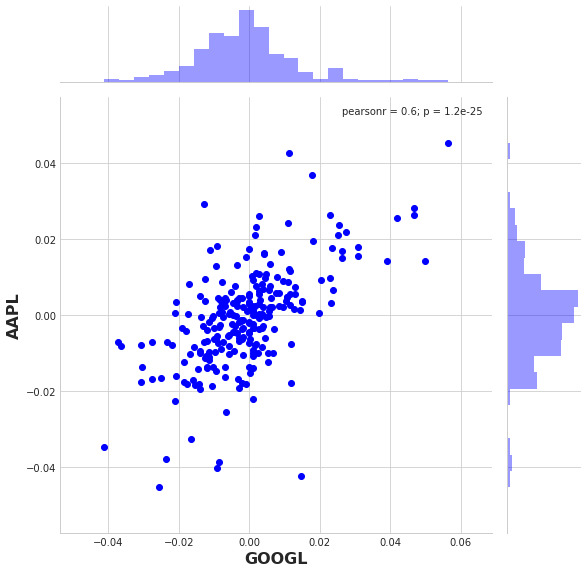

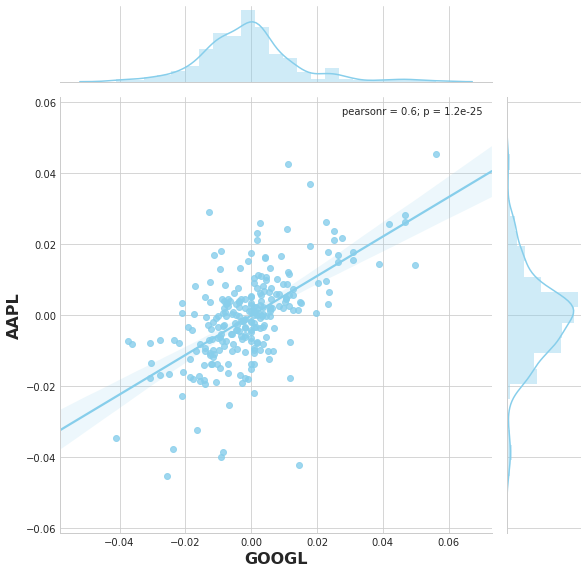

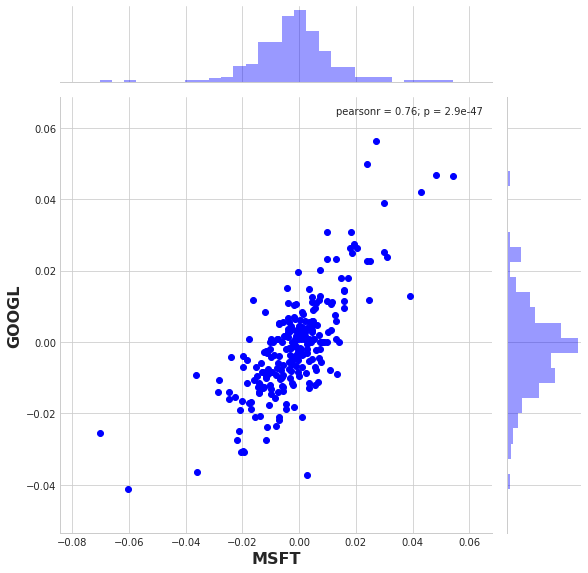

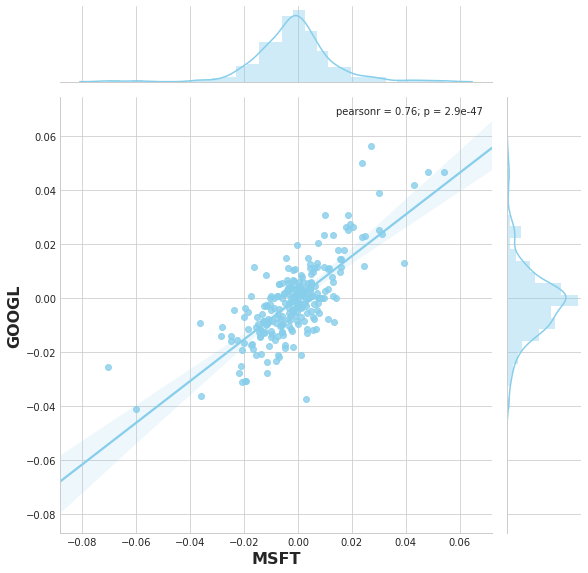

In [32]:
pair = ["MSFT", "AAPL", "GOOGL"]
for i in range(3):
    h = sns.jointplot(daily_returns[abbr[i]], daily_returns[pair[i]], daily_returns ,kind='scatter',color='blue', size=8)
    h.set_axis_labels(abbr[i], pair[i], fontsize=16, fontweight="bold")
    h = sns.jointplot(daily_returns[abbr[i]], daily_returns[pair[i]],daily_returns, kind='reg', size=8, color='skyblue')
    h.set_axis_labels(abbr[i], pair[i], fontsize=16, fontweight="bold")

- From all of the above graphs we can see that all the companies are correlated with eachother from the pearsonr value i.e  Pearson Product-Moment Correlation Coefficient.<br>

## Risk Ananlysis
There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns(Risk).

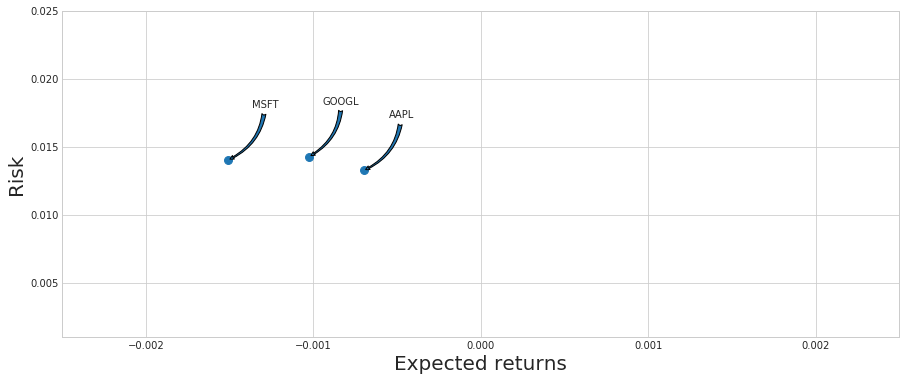

In [33]:
# Defining the area for the circles of scatter plot to avoid tiny little points
area = np.pi*20
plt.figure(figsize=(15, 6))
plt.scatter(daily_returns.mean(), daily_returns.std(), s=area,)

# Set the x and y limits of the plot (optional, remove this if you don't see anything in your plot)
plt.xlim([-0.0025,0.0025])
plt.ylim([0.001,0.025])

#Set the plot axis titles
plt.xlabel('Expected returns', fontdict={"fontsize":20})
plt.ylabel('Risk', fontdict={"fontsize":20})
# Label the scatter plots, for more info on how this is done, chekc out the link below
# http://matplotlib.org/users/annotations_guide.html
for label, x, y in zip(daily_returns.columns, daily_returns.mean(), daily_returns.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad=-0.3'))

By looking at the scatter plot we can say these stocks have **lower risk and positive expected returns.**

## Value at Risk
Let's go ahead and define a value at risk parameter for our stocks. We can treat value at risk as the amount of money we could expect to lose (aka putting at risk) for a given confidence interval. There's several methods we can use for estimating a value at risk. Let's go ahead and see some of them in action.

### Value at risk using the "bootstrap" method
For this method we will calculate the empirical quantiles from a histogram of daily returns. For more information on quantiles, check out this link: http://en.wikipedia.org/wiki/Quantile

Let's go ahead and repeat the daily returns histogram for Apple stock

/home/abhie/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


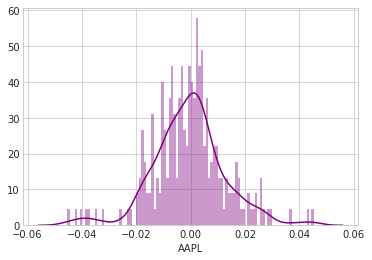

In [34]:
sns.distplot(daily_returns["AAPL"],bins=100,color='purple')
plt.show()

Now we can use quantile to get the risk value for the stock.

In [35]:
# The 0.05 empirical quantile of daily returns

# For APPL stocks
daily_returns["AAPL"].quantile(0.05)

-0.018660905423914666

The 0.05 empirical quantile of daily returns is at -0.018. That means that with 95% confidence, our **worst daily loss will not exceed 1.8%**. If we have a 1 million dollar investment, our one-day 5% VaR is 0.016 * 1,000,000 = $18,000.

In [36]:
# For GOOGL stocks
daily_returns["GOOGL"].quantile(0.05)

-0.02163862698595107

In [37]:
# For MSFT stocks
daily_returns["MSFT"].quantile(0.05)

-0.02065622790697249

### Value at Risk using the Monte Carlo method

Using the Monte Carlo to run many trials with random market conditions, then we'll calculate portfolio losses for each trial. After this, we'll use the aggregation of all these simulations to establish how risky the stock is.

Let's start with a brief explanation of what we're going to do:

We will use the geometric Brownian motion (GBM), which is technically known as a Markov process. This means that the stock price follows a random walk and is consistent with (at the very least) the weak form of the efficient market hypothesis (EMH): past price information is already incorporated and the next price movement is "conditionally independent" of past price movements.

This means that the past information on the price of a stock is independent of where the stock price will be in the future, basically meaning, you can't perfectly predict the future solely based on the previous price of a stock.

Now we see that the change in the stock price is the current stock price multiplied by two terms. The first term is known as "drift", which is the average daily return multiplied by the change of time. The second term is known as "shock", for each time period the stock will "drift" and then experience a "shock" which will randomly push the stock price up or down. By simulating this series of steps of drift and shock thousands of times, we can begin to do a simulation of where we might expect the stock price to be.

For more info on the Monte Carlo method for stocks and simulating stock prices with GBM model ie. geometric Brownian motion (GBM).

check out the following link: http://www.investopedia.com/articles/07/montecarlo.asp

A function that takes in the starting price and number of days, and uses the sigma and mu we already calculated form our daily returns.

In [38]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Next we will define the parameters required for **stock_monte_carlo** function.

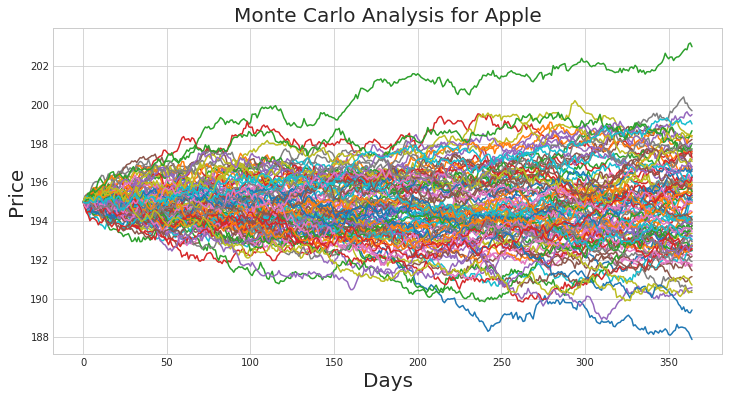

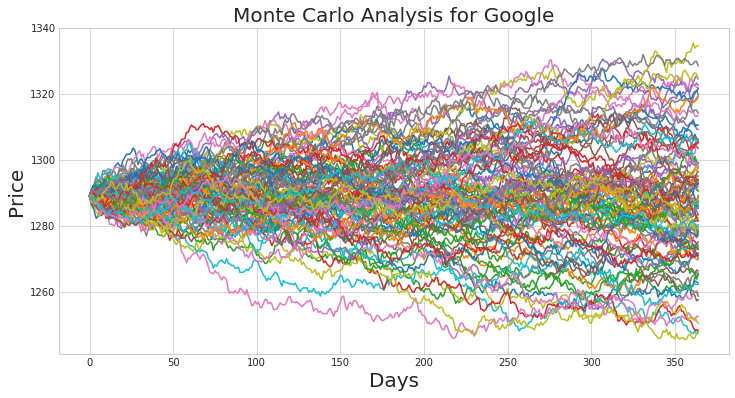

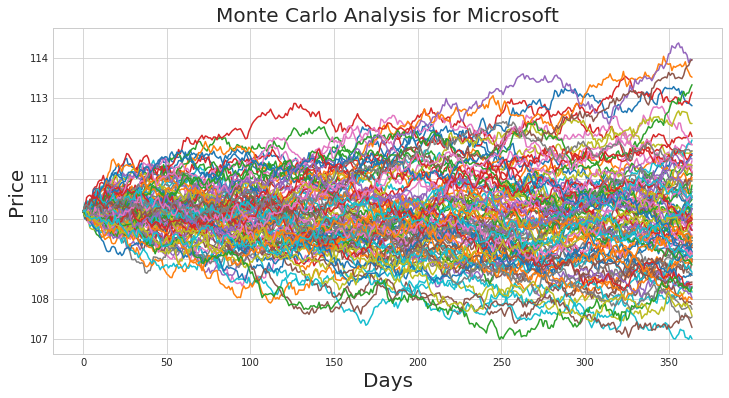

In [39]:
for i in range(3):
    # Set up our time horizon
    days = 365

    # Now our delta
    dt = 1/days

    # Now let's grab our mu (drift) from the expected return data we got for GOOGL
    mu = daily_returns.mean()[abbr[i]]

    # Now let's grab the volatility of the stock from the std() of the average return for GOOGL
    sigma = daily_returns.std()[abbr[i]]
    
    # Store the Open Price for each company
    start_price = companies[i]["Open"][0]
    
    plt.figure(figsize=(12, 6))
    for run in range(100):
        plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
    
    plt.xlabel("Days", fontsize=20)
    plt.ylabel("Price", fontsize=20)  
    plt.title(f'Monte Carlo Analysis for {name[i]}', fontsize=20)
    plt.show()

Now let's go ahead and get a histogram of the end results for a much larger run. (note: This could take a little while to run , depending on the number of runs chosen)

In [40]:
def mcs_histogram(company, c_name):
    # Openig price of company
    start_price = company["Open"][0]

    # Set a large numebr of runs
    runs = 10000

    # Create an empty matrix to hold the end price data
    simulations = np.zeros(runs)

    for run in range(runs):    
        # Set the simulation data point as the last stock price for that run
        simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]
        
    # Now we'll define q as the 1% empirical quantile, this basically means that 99% of the values should fall between here
    q = np.percentile(simulations,1)
    
    plt.figure(figsize=(15, 6))
    
    # Now let's plot the distribution of the end prices
    plt.hist(simulations, bins=200)

    # Using plt.figtext to fill in some additional information onto the plot

    # starting price
    plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price, fontsize=14)

    # mean ending price
    plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean(), fontsize=14)

    # Variance of the price (within 99% confidence interval)
    plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q), fontsize=14)

    # To display 1% quantile
    plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q, fontsize=16)

    # Plot a line at the 1% quantile result
    plt.axvline(x=q, linewidth=4, color='r')

    # For plot title
    plt.title(s=f"Final price distribution for {c_name} after %s days" % days, weight='bold', color='Y', fontsize=20)
    plt.show()
    
    print(f"Awesome! Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the {c_name}, which looks to be ${start_price - q:.2f} for every investment of {start_price} (The price of one initial {c_name} Stock).")
    print(f"This basically means for every initial AAPL stock you purchase you're putting about ${start_price - q:.2f} at risk 99% of the time from our Monte Carlo Simulation.")

In [ ]:
# For APPlE
mcs_histogram(apple, "AAPL")

In [ ]:
# For Google
mcs_histogram(google, "GOOGL")

In [ ]:
# For Microsoft
mcs_histogram(microsoft, "MSFT")

In [ ]:
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
for i in range(3):
    prices = companies[i]['Open']
    dates = list(reversed(range(len(prices))))

    #Convert to 1d Vector
    dates = np.reshape(dates, (len(dates), 1))
    regressor = LinearRegression()
    regressor.fit(dates, prices)
    
    #Visualize Results
    print('\n\033[1m',("Prediction for "+name[i]).center(100))
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    plt.scatter(dates, prices, color='yellow', label= 'Actual Price')    #plotting the initial datapoints
    plt.plot(dates, regressor.predict(dates), color='red', linewidth=2, label = 'Predicted Price')    #plotting the line made by linear regression
    plt.title('Linear Regression | Time vs. Price', fontsize=20)
    plt.legend(loc="upper left", fontsize=20)
    plt.xlabel('Date Integer', fontsize=20)
    plt.show()
 
    #Predict Price on Given Date
    date = len(dates)+1
    predicted_price =regressor.predict(date)
    print("Predicted price :", predicted_price[0])
    print("Regression Coefficient :", regressor.coef_[0])
    print("Regression Intercept :", regressor.intercept_)